## **Do Script:**

### Importações:

In [1]:
import pandas as pd
from random import randint as r_int
from random import choice
from datetime import datetime

### Funções:

#### Função validadora de saques:
> Para assertar que nenhuma conta tenha saldo negativo na geração de dados.

In [2]:
def validar_saque(id_conta: int, valor_saque:float) -> bool:
  df = pd.DataFrame(tabelas['Transacao'])

  transacoes_da_conta = df.query(f'id_Conta == {id_conta}')
  transacoes_deposito = transacoes_da_conta.query('tipo_transacao == "Deposito"')
  transacoes_saque = transacoes_da_conta.query('tipo_transacao == "Saque"')

  saldo = transacoes_deposito['valor'].sum() - transacoes_saque['valor'].sum()
  ver_final = saldo >= valor_saque and not (saldo == 0)
  return saldo >= valor_saque and not (saldo == 0)

#### Função buscadora de número:
> Retorna o maior valor de número de conta para a agencia passada.

In [3]:
def maior_numero(ag: int) -> int:
  df = pd.DataFrame(tabelas['Conta'])

  q_agencia = df.query(f'agencia == "{ag}"')
  return q_agencia.shape[0]

#### Função geradora de data:

In [4]:
def gerar_data(alto_alcance=False) -> datetime:
  min = 2010
  max = 2024
  if alto_alcance:
    min = 1965
    max = 2006

  while True:
    try:
      nova_data = datetime(r_int(min, max), r_int(1, 12), r_int(1, 31))
      return nova_data
    except ValueError:
      pass

### Estruturas Principais:
> Definindo as estruturas dos datasets e passando as informações de Clientes,  
> visto que será muito trabalhoso desenvolver um gerador de nomes e cadastros  
> `[cpf/cnpj]` aleatórios.

In [5]:
tabelas = {
  'Cliente': {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'nome': [
      'Pantheon Locações de Automóveis ME', 'Fábio Caio Lucas Novaes',
      'Maria Emilly Tânia Gomes', 'Thomas Isaac Pereira',
      'Laura Eletrônica Ltda', 'Larissa Bianca da Silva',
      'Giga Publicidade e Propaganda Ltda', 'Marcos Vitor Santos',
      'Mário Luan Martins', 'Sahara Casa Noturna ME',
      'Pedro Cauê Emanuel Moraes', 'Brenda Simone Aparecida Barbosa',
      'Pedro Henrique Gael Vieira', 'Theo Tiago Vicente Nascimento',
      'Morena Filmagens ME'
    ],
    'data_nascimento': [
        gerar_data(True), gerar_data(True), gerar_data(True), gerar_data(True),
        gerar_data(True), gerar_data(True), gerar_data(True), gerar_data(True),
        gerar_data(True), gerar_data(True), gerar_data(True), gerar_data(True),
        gerar_data(True), gerar_data(True), gerar_data(True)
    ],
    'cadastro': [
      46757945000153, 21673834604, 63953636464, 43764036796, 38246690000136,
      71239473559, 15995255000109, 71319564739, 37164721319, 90078195000185,
      65925496450, 13595021738, 58212019187, 74030018858, 26545004000149
    ],
    'tipo_pessoa': [
      'PJ', 'PF', 'PF', 'PF', 'PJ', 'PF', 'PJ', 'PF', 'PF', 'PJ', 'PF', 'PF',
      'PF', 'PF', 'PJ'
    ]
  },
  'Conta': {
    'id': [],
    'agencia': [],
    'numero': [],
    'id_Cliente': []
  },
  'Transacao': {
    'data': [],
    'valor': [],
    'tipo_transacao': [],
    'id_Conta': []
  }
}

### Gerando dados para o dataset 'Conta'
> Irá:
> > Gerar entre 20 e 40 contas, com uma chave primária auto-incremental;  
> > Escolher com `random.choice` uma entre cinco opções para agência;  
> > incrementar ao número de contas presentes na agência para o número; e  
> > associar uma chave estrangeira de um dos clientes criados.

In [6]:
i = 1
for _ in range(r_int(20, 40)):
  agencia = choice(['1345', '1884', '1992', '0433', '1001'])
  proximo_numero = int(maior_numero(agencia) + 1)
  id_cli = choice(tabelas['Cliente']['id'])

  tabelas['Conta']['id'].append(i)
  tabelas['Conta']['agencia'].append(agencia)
  tabelas['Conta']['numero'].append(f'{proximo_numero:04d}')
  tabelas['Conta']['id_Cliente'].append(id_cli)

  i += 1

### Gerando dados para o dataset 'Transacao'

In [7]:
for _ in range(r_int(1000, 1500)):
  id_conta = choice(tabelas['Conta']['id'])

  # Posto em um bloco `while True`, para assegurar que a conta não tenha saldo  _
  #   negativo.
  while True:
    valor = r_int(0,250000) + (r_int(0,100)/100)
    tipo_transacao = choice(['Deposito', 'Saque'])
    if tipo_transacao == 'Deposito':
      break
    elif validar_saque(id_conta, valor):
      break

  tabelas['Transacao']['data'].append(gerar_data())
  tabelas['Transacao']['tipo_transacao'].append(tipo_transacao)
  tabelas['Transacao']['valor'].append(valor)
  tabelas['Transacao']['id_Conta'].append(id_conta)

### Transformando os datasets em DataFrames

In [8]:
clientes = pd.DataFrame(tabelas['Cliente'])
contas = pd.DataFrame(tabelas['Conta'])
transacoes = pd.DataFrame(tabelas['Transacao'])

### Verificando as dimensões dos DataFrames


In [9]:
print(f'O DataFrame `clientes` tem {clientes.shape[1]} colunas e {clientes.shape[0]} linhas.')
print(f'O DataFrame `contas` tem {contas.shape[1]} colunas e {contas.shape[0]} linhas.')
print(f'O DataFrame `transacoes` tem {transacoes.shape[1]} colunas e {transacoes.shape[0]} linhas.')

O DataFrame `clientes` tem 5 colunas e 15 linhas.
O DataFrame `contas` tem 4 colunas e 34 linhas.
O DataFrame `transacoes` tem 4 colunas e 1457 linhas.


## **Das Consultas:**


### Com visualização por tabelas

#### >> Contagem de transações por tipo:

In [10]:
consulta_contagem_transacoes_por_tipo = pd.DataFrame([transacoes['tipo_transacao'].value_counts()])
print(consulta_contagem_transacoes_por_tipo)

tipo_transacao  Deposito  Saque
count                808    649


#### >> Constagem de contas por agencia

In [11]:
consulta_contagem_conta_por_agencia = contas['agencia'].value_counts(ascending=False)
print(consulta_contagem_conta_por_agencia)

agencia
1345    9
1992    8
1001    7
1884    6
0433    4
Name: count, dtype: int64


#### >> Saldo total por Conta:

In [12]:
consulta_depositos = (
  transacoes
    .query('tipo_transacao == "Deposito"')
      .groupby(by='id_Conta')
        ['valor'].sum()
  )
consulta_saques = (
  transacoes
    .query('tipo_transacao == "Saque"')
      .groupby(by='id_Conta')
        ['valor'].sum()
  )

consulta_saldos = pd.merge(
    consulta_depositos,
    consulta_saques,
    on='id_Conta'
    )

contas_col_renomeadas = (
  contas[
      ['id', 'agencia','numero', 'id_Cliente']
      ]
  .rename(
      columns={'id': 'id_Conta', 'agencia': 'ag', 'numero': 'num'}
      )
  )
contas_col_renomeadas['ag/num'] = (
    contas_col_renomeadas['ag'].astype('str')
  + '/'
  + contas_col_renomeadas['num'].astype('str')
)

consulta_saldos = pd.merge(
    contas_col_renomeadas[['id_Conta', 'ag/num']],
    consulta_saldos,
    on='id_Conta'
)

consulta_saldos['saldo'] = (
    consulta_saldos['valor_x']
  - consulta_saldos['valor_y']
    )

consulta_saldos.drop(columns=['valor_x', 'valor_y'], inplace=True)
print(consulta_saldos)

    id_Conta     ag/num       saldo
0          1  1001/0001   530821.18
1          2  0433/0001    55619.90
2          3  1345/0001   497953.42
3          4  1001/0002  1178175.16
4          5  1884/0001   425254.48
5          6  1992/0001    99511.33
6          7  1345/0002   269546.65
7          8  1345/0003  1355634.37
8          9  1884/0002   263155.49
9         10  0433/0002   775486.95
10        11  1001/0003   185301.72
11        12  1345/0004  1406786.81
12        13  1884/0003   355373.53
13        14  1345/0005   233762.98
14        15  1001/0004  1860551.60
15        16  1345/0006  1281013.95
16        17  1992/0002  1537290.00
17        18  1345/0007   589585.58
18        19  1001/0005   580229.54
19        20  1345/0008   355385.17
20        21  1884/0004   142015.40
21        22  1992/0003   148449.56
22        23  1992/0004  1001224.94
23        24  1992/0005  1494251.61
24        25  1345/0009  1416203.77
25        26  1992/0006   729501.44
26        27  1884/0005   39

#### >> Saldo total por tipo de pessoa:

In [13]:
saldo_total_com_id_cliente = pd.merge(
    contas_col_renomeadas[['id_Conta', 'id_Cliente']],
    consulta_saldos,
    on='id_Conta'
)

saldo_de_contas_com_tipo_pessoa = pd.merge(
    saldo_total_com_id_cliente,
    clientes[['tipo_pessoa', 'id']].rename(columns={'id': 'id_Cliente'}),
    on='id_Cliente', validate='many_to_one'
).drop(columns=['ag/num', 'id_Conta', 'id_Cliente'])

saldo_por_tipo_pessoa = (
    saldo_de_contas_com_tipo_pessoa
      .groupby('tipo_pessoa')['saldo']
        .sum()
)

print(saldo_por_tipo_pessoa)

tipo_pessoa
PF    15908141.21
PJ     6678127.20
Name: saldo, dtype: float64


### Com visualização por gráficos:

#### >> Saldos por tipo de pessoa em 'gráfico pizza'

<Axes: ylabel='saldo'>

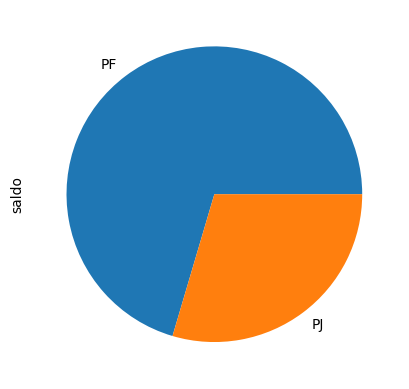

In [14]:
saldo_por_tipo_pessoa.plot.pie()

#### >> Balanço do fundo bancário ao longo do tempo em linha

<Axes: xlabel='data'>

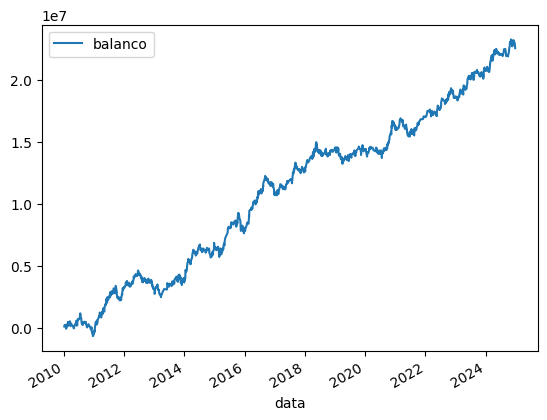

In [15]:
transacoes['multiplicador'] = (
    transacoes['tipo_transacao'].apply(
        lambda tipo: -1 if tipo == 'Saque' else 1
        )
    )

transacoes['valor_real'] = transacoes['valor'] * transacoes['multiplicador']

transacoes_ordenadas_por_data = transacoes[
    ['data', 'valor_real']
].sort_values('data')

balanco = []
valor_atual = 0
for valor_transacao in transacoes_ordenadas_por_data['valor_real']:
  valor_atual += valor_transacao
  balanco.append(valor_atual)

transacoes_ordenadas_por_data['balanco'] = balanco

transacoes_ordenadas_por_data.plot.line('data', 'balanco')